In [2]:
import requests
import json
from pprint import pprint

#5日間（3時間ごと）の転機を取得する：東京
url = "http://api.openweathermap.org/data/2.5/forecast?q={city}&appid={key}&lang=ja&units=metric"
url = url.format(city="Tokyo,JP",key="3ef29478a51673d3da38f05c9819fc71")

jsondata = requests.get(url).json()
pprint(jsondata)

{'city': {'coord': {'lat': 35.6895, 'lon': 139.6917},
          'country': 'JP',
          'id': 1850144,
          'name': '東京都',
          'population': 12445327,
          'sunrise': 1708377834,
          'sunset': 1708417593,
          'timezone': 32400},
 'cnt': 40,
 'cod': '200',
 'list': [{'clouds': {'all': 83},
           'dt': 1708365600,
           'dt_txt': '2024-02-19 18:00:00',
           'main': {'feels_like': 16.55,
                    'grnd_level': 1008,
                    'humidity': 88,
                    'pressure': 1014,
                    'sea_level': 1014,
                    'temp': 16.54,
                    'temp_kf': 0.51,
                    'temp_max': 16.54,
                    'temp_min': 16.03},
           'pop': 0.62,
           'rain': {'3h': 1.33},
           'sys': {'pod': 'n'},
           'visibility': 10000,
           'weather': [{'description': '小雨',
                        'icon': '10n',
                        'id': 500,
                     

In [3]:
from datetime import datetime, timedelta, timezone

#UTC(協定世界時)をJST（日本標準時）に変換
timestamp = 1562889600

tz = timezone(timedelta(),'UTC')
utc = datetime.fromtimestamp(timestamp,tz)
print(utc)

tz = timezone(timedelta(hours=+9),'JST')
jst = datetime.fromtimestamp(timestamp,tz)
print(jst)
print(str(jst)[:-9])

2019-07-12 00:00:00+00:00
2019-07-12 09:00:00+09:00
2019-07-12 09:00


In [5]:
import requests
import json
from datetime import datetime, timedelta, timezone

url = "http://api.openweathermap.org/data/2.5/forecast?q={city}&appid={key}&lang=ja&units=metric"
url = url.format(city="Tokyo,JP",key="3ef29478a51673d3da38f05c9819fc71")

jsondata = requests.get(url).json()
tz = timezone(timedelta(hours=+9),'JST')
for dat in jsondata["list"]:
    jst = str(datetime.fromtimestamp(dat["dt"],tz))[:-9]
    print("UTC={utc},JST={jst}".format(utc=dat["dt_txt"],jst=jst))

UTC=2024-02-19 18:00:00,JST=2024-02-20 03:00
UTC=2024-02-19 21:00:00,JST=2024-02-20 06:00
UTC=2024-02-20 00:00:00,JST=2024-02-20 09:00
UTC=2024-02-20 03:00:00,JST=2024-02-20 12:00
UTC=2024-02-20 06:00:00,JST=2024-02-20 15:00
UTC=2024-02-20 09:00:00,JST=2024-02-20 18:00
UTC=2024-02-20 12:00:00,JST=2024-02-20 21:00
UTC=2024-02-20 15:00:00,JST=2024-02-21 00:00
UTC=2024-02-20 18:00:00,JST=2024-02-21 03:00
UTC=2024-02-20 21:00:00,JST=2024-02-21 06:00
UTC=2024-02-21 00:00:00,JST=2024-02-21 09:00
UTC=2024-02-21 03:00:00,JST=2024-02-21 12:00
UTC=2024-02-21 06:00:00,JST=2024-02-21 15:00
UTC=2024-02-21 09:00:00,JST=2024-02-21 18:00
UTC=2024-02-21 12:00:00,JST=2024-02-21 21:00
UTC=2024-02-21 15:00:00,JST=2024-02-22 00:00
UTC=2024-02-21 18:00:00,JST=2024-02-22 03:00
UTC=2024-02-21 21:00:00,JST=2024-02-22 06:00
UTC=2024-02-22 00:00:00,JST=2024-02-22 09:00
UTC=2024-02-22 03:00:00,JST=2024-02-22 12:00
UTC=2024-02-22 06:00:00,JST=2024-02-22 15:00
UTC=2024-02-22 09:00:00,JST=2024-02-22 18:00
UTC=2024-0

In [6]:
import requests
import json
from datetime import datetime, timedelta, timezone

url = "http://api.openweathermap.org/data/2.5/forecast?q={city}&appid={key}&lang=ja&units=metric"
url = url.format(city="Tokyo,JP",key="3ef29478a51673d3da38f05c9819fc71")

jsondata = requests.get(url).json()
tz = timezone(timedelta(hours=+9),'JST')
for dat in jsondata["list"]:
    jst = str(datetime.fromtimestamp(dat["dt"],tz))[:-9]
    weather = dat["weather"][0]["description"]
    temp = dat["main"]["temp"]
    print("日時：{jst},天気：{w},気温：{t}度".format(jst=jst,w=weather,t=temp))

日時：2024-02-20 03:00,天気：小雨,気温：16.62度
日時：2024-02-20 06:00,天気：小雨,気温：15.38度
日時：2024-02-20 09:00,天気：厚い雲,気温：16.1度
日時：2024-02-20 12:00,天気：厚い雲,気温：19.14度
日時：2024-02-20 15:00,天気：厚い雲,気温：20.48度
日時：2024-02-20 18:00,天気：厚い雲,気温：16.76度
日時：2024-02-20 21:00,天気：厚い雲,気温：13.95度
日時：2024-02-21 00:00,天気：小雨,気温：11.42度
日時：2024-02-21 03:00,天気：厚い雲,気温：10.19度
日時：2024-02-21 06:00,天気：小雨,気温：9.53度
日時：2024-02-21 09:00,天気：小雨,気温：8.75度
日時：2024-02-21 12:00,天気：小雨,気温：8.76度
日時：2024-02-21 15:00,天気：小雨,気温：9.23度
日時：2024-02-21 18:00,天気：小雨,気温：8.82度
日時：2024-02-21 21:00,天気：適度な雨,気温：8.1度
日時：2024-02-22 00:00,天気：小雨,気温：7.65度
日時：2024-02-22 03:00,天気：小雨,気温：7.27度
日時：2024-02-22 06:00,天気：小雨,気温：7.04度
日時：2024-02-22 09:00,天気：小雨,気温：6.54度
日時：2024-02-22 12:00,天気：小雨,気温：4.67度
日時：2024-02-22 15:00,天気：小雨,気温：4.52度
日時：2024-02-22 18:00,天気：厚い雲,気温：5.72度
日時：2024-02-22 21:00,天気：厚い雲,気温：5.47度
日時：2024-02-23 00:00,天気：厚い雲,気温：5.29度
日時：2024-02-23 03:00,天気：小雨,気温：4.07度
日時：2024-02-23 06:00,天気：小雨,気温：3.35度
日時：2024-02-23 09:00,天気：小雨,気温：3.08度
日時：2024-02-23 12:00,天気：小雨,気温：3.7度
日時：

In [9]:
import requests
import json
from datetime import datetime, timedelta, timezone
from pprint import pprint
import pandas as pd

url = "http://api.openweathermap.org/data/2.5/forecast?q={city}&appid={key}&lang=ja&units=metric"
url = url.format(city="Tokyo,JP",key="3ef29478a51673d3da38f05c9819fc71")

jsondata = requests.get(url).json()
df = pd.DataFrame(columns = ["気温"])
tz = timezone(timedelta(hours=+9),'JST')
for dat in jsondata["list"]:
    jst = str(datetime.fromtimestamp(dat["dt"],tz))[:-9]
    weather = dat["weather"][0]["description"]
    temp = dat["main"]["temp"]
    df.loc[jst] = temp
    
pprint(df)

                     気温
2024-02-20 03:00  16.62
2024-02-20 06:00  15.38
2024-02-20 09:00  16.10
2024-02-20 12:00  19.14
2024-02-20 15:00  20.48
2024-02-20 18:00  16.76
2024-02-20 21:00  13.95
2024-02-21 00:00  11.42
2024-02-21 03:00  10.19
2024-02-21 06:00   9.53
2024-02-21 09:00   8.75
2024-02-21 12:00   8.76
2024-02-21 15:00   9.23
2024-02-21 18:00   8.82
2024-02-21 21:00   8.10
2024-02-22 00:00   7.65
2024-02-22 03:00   7.27
2024-02-22 06:00   7.04
2024-02-22 09:00   6.54
2024-02-22 12:00   4.67
2024-02-22 15:00   4.52
2024-02-22 18:00   5.72
2024-02-22 21:00   5.47
2024-02-23 00:00   5.29
2024-02-23 03:00   4.07
2024-02-23 06:00   3.35
2024-02-23 09:00   3.08
2024-02-23 12:00   3.70
2024-02-23 15:00   4.48
2024-02-23 18:00   4.43
2024-02-23 21:00   5.01
2024-02-24 00:00   4.96
2024-02-24 03:00   4.22
2024-02-24 06:00   3.63
2024-02-24 09:00   4.56
2024-02-24 12:00   7.17
2024-02-24 15:00   8.90
2024-02-24 18:00   8.47
2024-02-24 21:00   7.00
2024-02-25 00:00   6.62


C:\Users\81701\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


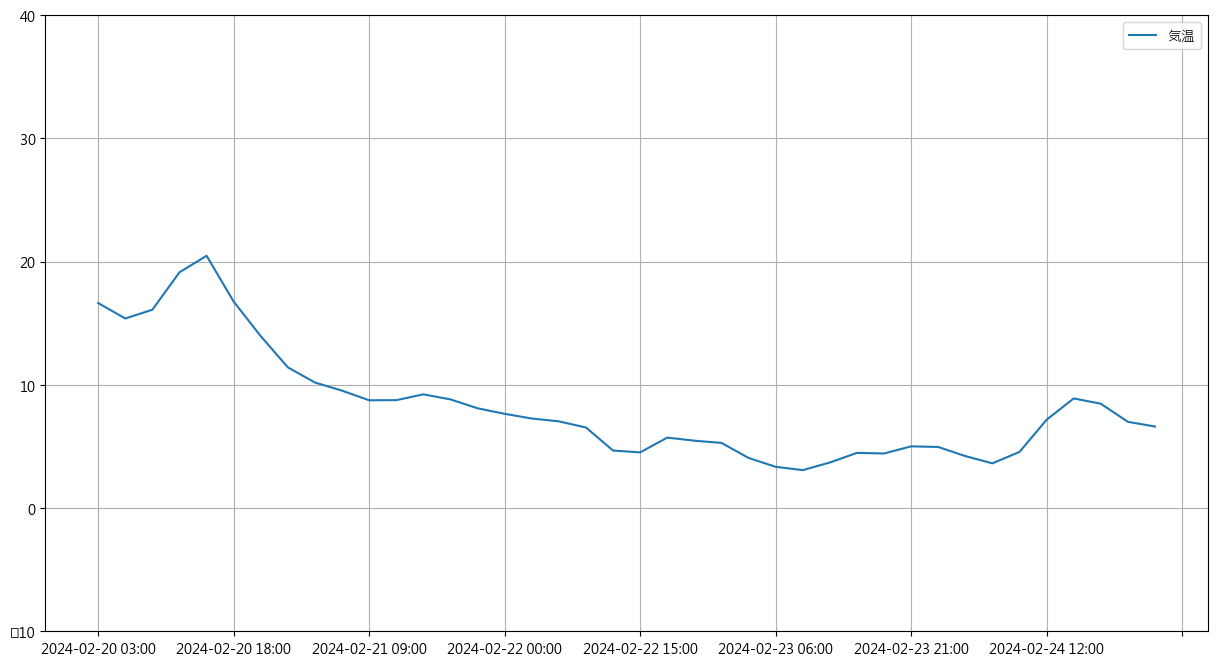

In [1]:
import requests
import json
from datetime import datetime, timedelta, timezone
from pprint import pprint
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = "Microsoft JhengHei" #フォントの指定

url = "http://api.openweathermap.org/data/2.5/forecast?q={city}&appid={key}&lang=ja&units=metric"
url = url.format(city="Tokyo,JP",key="3ef29478a51673d3da38f05c9819fc71")

jsondata = requests.get(url).json()
df = pd.DataFrame(columns = ["気温"])
tz = timezone(timedelta(hours=+9),'JST')
for dat in jsondata["list"]:
    jst = str(datetime.fromtimestamp(dat["dt"],tz))[:-9]
    weather = dat["weather"][0]["description"]
    temp = dat["main"]["temp"]
    df.loc[jst] = temp

df.plot(figsize=(15,8))
plt.ylim(-10,40)
plt.grid()
plt.show()